In [9013]:
import os
import glob
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

<h3> Etude primaire du Dataset <h3>  

In [9014]:
metadata_ch="individualdata.csv"
metadata=pd.read_csv(metadata_ch, sep=';', quotechar='"')
metadata.head()

,cruise,serialno,platform,SpecCat,species,noname,aphia,samplenumber,no,weight,...,weightmethod,stomachfillfield,liverparasite,spawningage,spawningzones,readability,otolithtype,otolithedge,otolithcentre,calibration
0,2017102,70029,4174,torsk,164712,torsk,126436,1,1,2000.0,...,1.0,NaN,NaN,NaN,NaN,4,5.0,4.0,NaN,NaN
1,2017102,70029,4174,torsk,164712,torsk,126436,1,2,605.0,...,1.0,NaN,NaN,NaN,NaN,1,5.0,4.0,NaN,NaN
2,2017102,70029,4174,torsk,164712,torsk,126436,1,3,800.0,...,1.0,NaN,NaN,NaN,NaN,1,5.0,4.0,NaN,NaN
3,2017102,70029,4174,torsk,164712,torsk,126436,1,4,14.0,...,1.0,NaN,NaN,NaN,NaN,1,NaN,4.0,NaN,NaN
4,2017102,70029,4174,torsk,164712,torsk,126436,1,6,195.0,...,1.0,NaN,NaN,NaN,NaN,1,5.0,4.0,NaN,NaN


In [9015]:
metadata.duplicated().sum()

0

In [9016]:
metadata['noname'].unique()

array(['torsk'], dtype=object)

In [9017]:
metadata.shape

(1007, 34)

In [9018]:
metadata.columns

Index(['cruise', 'serialno', 'platform', 'SpecCat', 'species', 'noname',
       'aphia', 'samplenumber', 'no', 'weight', 'length', 'age', 'sex',
       'developmentalstage', 'stage', 'specialstage', 'digestdeg', 'fat',
       'liver', 'liverweight', 'gonadweight', 'stomachweight', 'vertebrae',
       'lengthunit', 'weightmethod', 'stomachfillfield', 'liverparasite',
       'spawningage', 'spawningzones', 'readability', 'otolithtype',
       'otolithedge', 'otolithcentre', 'calibration'],
      dtype='object')

In [9019]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cruise              1007 non-null   int64  
 1   serialno            1007 non-null   int64  
 2   platform            1007 non-null   int64  
 3   SpecCat             1007 non-null   object 
 4   species             1007 non-null   int64  
 5   noname              1007 non-null   object 
 6   aphia               1007 non-null   int64  
 7   samplenumber        1007 non-null   int64  
 8   no                  1007 non-null   int64  
 9   weight              1004 non-null   float64
 10  length              1007 non-null   float64
 11  age                 1005 non-null   float64
 12  sex                 961 non-null    float64
 13  developmentalstage  0 non-null      float64
 14  stage               951 non-null    float64
 15  specialstage        0 non-null      float64
 16  digest

In [9020]:
memory_usage = metadata.memory_usage(deep=True) / 1024 ** 2
print('memory usage of features: \n', memory_usage.head())
print('memory usage sum: ',memory_usage.sum())

memory usage of features: 
 Index       0.000126
cruise      0.007683
serialno    0.007683
platform    0.007683
SpecCat     0.051859
dtype: float64
memory usage sum:  0.34969329833984375


<h2> Optimisation de l'utilisation mémoire d'un DataFrame <h2>

In [9021]:
def reduce_memory_usage(df):
    numerics = ["int8", "int16", "int32", "int64", "float16", "float32", "float64"]
    start_mem = df.memory_usage().sum() / 1024 ** 2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == "int":
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024 ** 2
    print("Memory usage decreased to {:.2f} Mb ({:.1f}% reduction)".format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df
df = reduce_memory_usage(metadata)

Memory usage decreased to 0.14 Mb (47.0% reduction)


In [9022]:
memory_usage = metadata.memory_usage(deep=True) / 1024 ** 2
print('memory usage of features: \n', memory_usage.head())
print('memory usage sum: ',memory_usage.sum())

memory usage of features: 
 Index       0.000126
cruise      0.003841
serialno    0.003841
platform    0.001921
SpecCat     0.051859
dtype: float64
memory usage sum:  0.22676849365234375


In [9023]:
df.describe()

c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,cruise,serialno,platform,species,aphia,samplenumber,no,weight,length,age,...,weightmethod,stomachfillfield,liverparasite,spawningage,spawningzones,readability,otolithtype,otolithedge,otolithcentre,calibration
count,1.007000e+03,1007.000000,1007.000000,1007.0,1007.0,1007.000000,1007.000000,1004.0,1007.000000,1005.000000,...,1004.0,4.00,0.0,599.000000,599.000000,1007.000000,977.000000,1005.000000,0.0,0.0
mean,2.017988e+06,70676.125124,1420.172790,164712.0,126436.0,1.071500,12.535253,inf,inf,6.972656,...,1.0,4.75,NaN,7.625000,1.108398,1.734856,4.433594,3.968750,NaN,NaN
std,4.931597e+02,407.583423,932.792187,0.0,0.0,0.257785,12.226348,inf,25.421875,3.134766,...,0.0,2.50,NaN,1.707031,1.526367,1.666596,1.337891,0.304199,NaN,NaN
min,2.017102e+06,70024.000000,1019.000000,164712.0,126436.0,1.000000,1.000000,5.0,9.000000,1.000000,...,1.0,1.00,NaN,3.000000,0.000000,1.000000,1.000000,1.000000,NaN,NaN
25%,2.017625e+06,70315.000000,1019.000000,164712.0,126436.0,1.000000,4.000000,1413.0,54.000000,5.000000,...,1.0,4.75,NaN,7.000000,0.000000,1.000000,5.000000,4.000000,NaN,NaN
50%,2.018202e+06,71006.000000,1172.000000,164712.0,126436.0,1.000000,8.000000,3164.0,72.000000,7.000000,...,1.0,6.00,NaN,8.000000,1.000000,1.000000,5.000000,4.000000,NaN,NaN
75%,2.018203e+06,71021.000000,1173.000000,164712.0,126436.0,1.000000,16.000000,5804.0,86.000000,9.000000,...,1.0,6.00,NaN,9.000000,2.000000,1.000000,5.000000,4.000000,NaN,NaN
max,2.018836e+06,71040.000000,4174.000000,164712.0,126436.0,2.000000,62.000000,23616.0,132.000000,16.000000,...,1.0,6.00,NaN,12.000000,8.000000,6.000000,5.000000,4.000000,NaN,NaN


<h2> Gestion des valeurs nulles et aberrantes <h2>

In [9024]:
df.isnull().sum().sort_values(ascending=False)

fat                   1007
developmentalstage    1007
otolithcentre         1007
liverparasite         1007
vertebrae             1007
stomachweight         1007
liver                 1007
digestdeg             1007
specialstage          1007
calibration           1007
stomachfillfield      1003
gonadweight            420
spawningzones          408
spawningage            408
liverweight            165
stage                   56
sex                     46
otolithtype             30
weight                   3
weightmethod             3
otolithedge              2
age                      2
length                   0
SpecCat                  0
platform                 0
readability              0
species                  0
lengthunit               0
noname                   0
aphia                    0
serialno                 0
samplenumber             0
no                       0
cruise                   0
dtype: int64

<h3> Eliminer les colonnes n'ayant que des valeurs nulles <h3>

<h5> On peut clairement voir qu'il existe des colonnes où toutes leurs valeurs sont nulles, ils n'apportent aucune information de plus, c'est pourquoi on va les éliminer <h5>

In [9025]:
df = df.dropna(axis=1, how='all')

In [9026]:
df.isnull().sum().sort_values(ascending=False)

stomachfillfield    1003
gonadweight          420
spawningzones        408
spawningage          408
liverweight          165
stage                 56
sex                   46
otolithtype           30
weightmethod           3
weight                 3
age                    2
otolithedge            2
serialno               0
length                 0
no                     0
samplenumber           0
lengthunit             0
aphia                  0
noname                 0
species                0
SpecCat                0
readability            0
platform               0
cruise                 0
dtype: int64

 <h3> a) Évaluation de la colonne "stomachfillfield" <h3>

1) Etude de la disponnibilité des données

In [9027]:
nb_total=len(df)
nb_valeurs=df['stomachfillfield'].notna().sum()
nb_nan=df['stomachfillfield'].isna().sum()
taux_de_remp=(nb_valeurs/nb_total)*100
taux_manquant=(nb_nan/nb_total)*100
print(f"Total d'observation: {nb_total}")
print(f"valeurs présentes : {taux_de_remp:.2f}%")
print(f"Valeurs manquantes: {taux_manquant:.2f}%")

Total d'observation: 1007
valeurs présentes : 0.40%
Valeurs manquantes: 99.60%


Le taux de remplissage est de 0.4 qui est inférieur à 1.

0.4% c'est statistiquement inexploitable. Même les tests statistiques les plus basiques nécessitent au minimum 30 observations.

2. Distribution des valeurs présentes

In [9028]:
value_counts = df['stomachfillfield'].value_counts(dropna=False)
print(f"\nDistribution des valeurs :")
for val, count in value_counts.items():
    if pd.notna(val):
        pct = (count / nb_valeurs) * 100
        print(f"{val} : {count} observations ({pct:5.1f}%)")
nb_unique = df['stomachfillfield'].nunique()
print(f"\nNombre de valeurs distinctes : {nb_unique}")


Distribution des valeurs :
6.0 : 3 observations ( 75.0%)
1.0 : 1 observations ( 25.0%)

Nombre de valeurs distinctes : 2


In [9029]:
min_val = df['stomachfillfield'].min()
max_val = df['stomachfillfield'].max()
mean_val = df['stomachfillfield'].mean()
median_val = df['stomachfillfield'].median()
print(f"Minimum  : {min_val:.2f}")
print(f"Maximum  : {max_val:.2f}")
print(f"Moyenne  : {mean_val:.2f}")
print(f"Médiane  : {median_val:.2f}")

Minimum  : 1.00
Maximum  : 6.00
Moyenne  : 4.75
Médiane  : 6.00


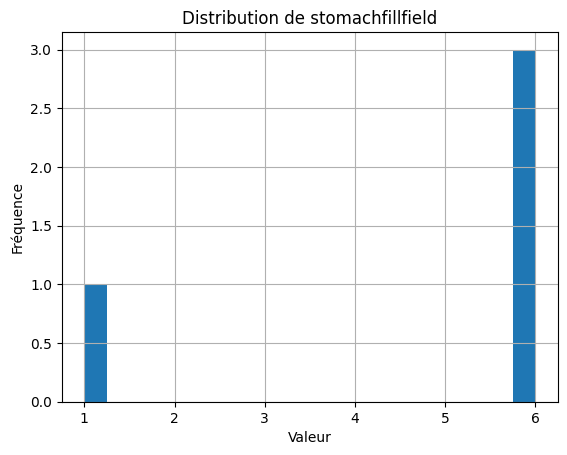

In [9030]:
df['stomachfillfield'].dropna().hist(bins=20)
plt.title('Distribution de stomachfillfield')
plt.xlabel('Valeur')
plt.ylabel('Fréquence')
plt.show()

Avec seulement 4 observations :

-Une valeur représente 25% de l'échantillon

-Une valeur extrême fausse toutes les statistiques (moyenne...)

-Il est impossible de distinguer valeur aberrante vs vraie variabilité

Cette colonne est inexploitable pour le nbre d'observations qui est peu mais aussi pour la valeur extrême (valeur aberrante) qui tire la moyenne vers le bas (asymétrie vers la gauche) et qui fausse toutes la statistique.

In [9031]:
df= df.drop(columns=['stomachfillfield'])

In [9032]:
df.isnull().sum().sort_values(ascending=False)

gonadweight      420
spawningzones    408
spawningage      408
liverweight      165
stage             56
sex               46
otolithtype       30
weightmethod       3
weight             3
age                2
otolithedge        2
serialno           0
length             0
no                 0
samplenumber       0
aphia              0
lengthunit         0
noname             0
species            0
SpecCat            0
readability        0
platform           0
cruise             0
dtype: int64

 <h3> b) Évaluation de la colonne "gonadweight" <h3>

1. Étude statistique de la variable `gonadweight`

`Objectif` :
Analyser la distribution, les valeurs manquantes, la relation avec les autres variables
et évaluer la pertinence biologique de cette variable.

Le poids des gonades est un indicateur clé de la maturité sexuelle chez les poissons.

a) Analyse des valeurs manquantes

In [9033]:
nb_total=len(df)
nb_valeurs=df['gonadweight'].notna().sum()
nb_nan=df['gonadweight'].isna().sum()
taux_de_remp=(nb_valeurs/nb_total)*100
taux_manquant=(nb_nan/nb_total)*100
print(f"Total d'observation: {nb_total}")
print(f"valeurs présentes : {taux_de_remp:.2f}%")
print(f"Valeurs manquantes: {taux_manquant:.2f}%")

Total d'observation: 1007
valeurs présentes : 58.29%
Valeurs manquantes: 41.71%


Interprétation :

Le taux de valeurs manquantes est d’environ 41.7%.
Ce taux est élevé mais reste exploitable.

Les valeurs manquantes ne semblent pas être totalement aléatoires.
Une analyse par âge et par sexe est nécessaire.

b) Statistiques descriptives

In [9034]:
df['gonadweight'].describe()

count    587.000000
mean       0.479980
std        0.830566
min        0.001000
25%        0.009003
50%        0.106018
75%        0.487061
max        5.238281
Name: gonadweight, dtype: float64

Interprétation :

- La médiane est nettement inférieure à la moyenne → distribution asymétrique à droite.
- La majorité des individus présentent des gonades peu développées.
- Une minorité d’individus très matures tire la moyenne vers le haut.

In [9035]:
print("Valeur minimale :", df['gonadweight'].min())
print("Valeur maximale :", df['gonadweight'].max())

Valeur minimale : 0.001
Valeur maximale : 5.24


c) Distribution des valeurs présentes

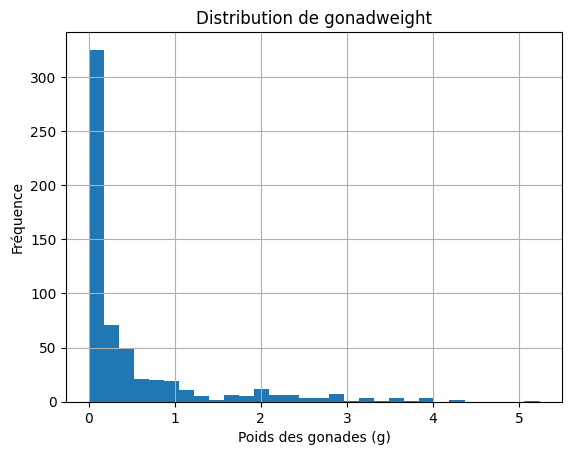

In [9036]:
df['gonadweight'].dropna().hist(bins=30)
plt.title("Distribution de gonadweight")
plt.xlabel("Poids des gonades (g)")
plt.ylabel("Fréquence")
plt.show()

L’histogramme confirme une distribution asymétrique à droite, caractérisée par une forte concentration de valeurs faibles et une longue traîne correspondant aux individus matures.

Le poids des gonades indique la maturité sexuelle du poisson, l'état de reproduction et l'investissement énergétique, c'est une variable clé pour études de reproduction

d) Distribution selon le sexe

In [9037]:
df['sex'] = df['sex'].astype('float32')
df['gonadweight'] = df['gonadweight'].astype('float32')
stats_by_sex = df.groupby('sex')['gonadweight'].agg(['count', 'mean', 'std'])
print(stats_by_sex)

     count      mean       std
sex                           
1.0    392  0.638315  0.955241
2.0    195  0.161493  0.304131


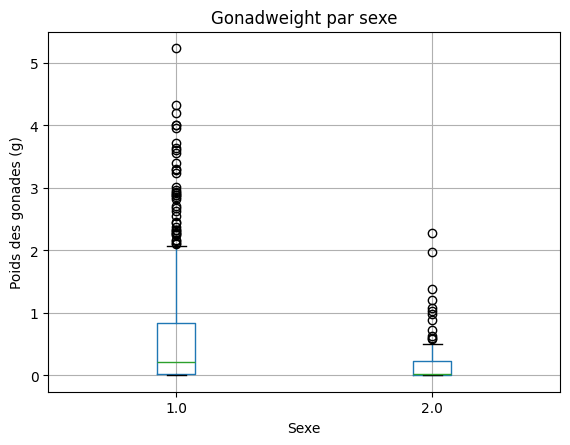

In [9038]:
df.boxplot(column='gonadweight', by='sex')
plt.title("Gonadweight par sexe")
plt.suptitle("")
plt.xlabel("Sexe")
plt.ylabel("Poids des gonades (g)")
plt.show()

Interprétation :

- Les individus de sexe 1 présentent un poids moyen des gonades plus élevé.
Cela est cohérent avec le dimorphisme sexuel attendu.

- La dispersion est également plus importante chez les femelles.


In [9039]:
cross_tab = pd.crosstab(df['sex'].fillna(-1),df['gonadweight'].isna(), margins=True)
print(cross_tab)

pct_femelles = (stats_by_sex.loc[1.0, 'count'] / 454) * 100
pct_males = (stats_by_sex.loc[2.0, 'count'] / 507) * 100
print(f"Femelles avec données : {pct_femelles:.1f}%")
print(f"Mâles avec données : {pct_males:.1f}%")
print(f"Sexe inconnu : 0% (juvéniles immatures)")

gonadweight  False  True   All
sex                           
-1.0             0    46    46
 1.0           392    62   454
 2.0           195   312   507
 All           587   420  1007
Femelles avec données : 86.3%
Mâles avec données : 38.5%
Sexe inconnu : 0% (juvéniles immatures)


Ici, on peut voir, que les poissons qui ont un sexe inconnu (-1.0) qui sont 46 poissons, non pas de calcul de gonadaweight (probablement des juvéniles), pour les femelles ont peut voir que 62 n'ont pas de calcul de gonadaweight (immature ou stérilité) mm chose pour male

La question est: Si je connais le sexe, cad qu'il y'a une existance des gonades donc soit, pas de calcul sur le terrain, soit pas de mesure concrète et donc des valeurs manquantes, pas un juvénile.
Sauf que après recherche, j'ai trouvé que le sexe des poissons, peut etre clairemnt déterminé par d'autres caractéristiques comme la couleur du poisson ou des tests ADN ou des gonades qui sont très petites et on est donc pas aptes de les mesurer.

Source: https://pmc.ncbi.nlm.nih.gov/articles/PMC12360136/ (2.2.2 sexe)

e) Distribution selon l'âge


In [9040]:
df['age'] = df['age'].astype('float32')
df['age_group'] = pd.cut(df['age'], bins=[0,1,2,3,4,5,6,7,8,9,10,20], right=False)
missing_by_age = df.groupby('age_group')['gonadweight'].apply(lambda x: x.isna().mean() * 100)
print(missing_by_age)

age_group
[0, 1)             NaN
[1, 2)       97.297297
[2, 3)      100.000000
[3, 4)       87.500000
[4, 5)       43.902439
[5, 6)       27.777778
[6, 7)       26.771654
[7, 8)       29.655172
[8, 9)       40.336134
[9, 10)      31.182796
[10, 20)     33.168317
Name: gonadweight, dtype: float64


C:\Users\pc\AppData\Local\Temp\ipykernel_14948\3563629332.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  missing_by_age = df.groupby('age_group')['gonadweight'].apply(lambda x: x.isna().mean() * 100)


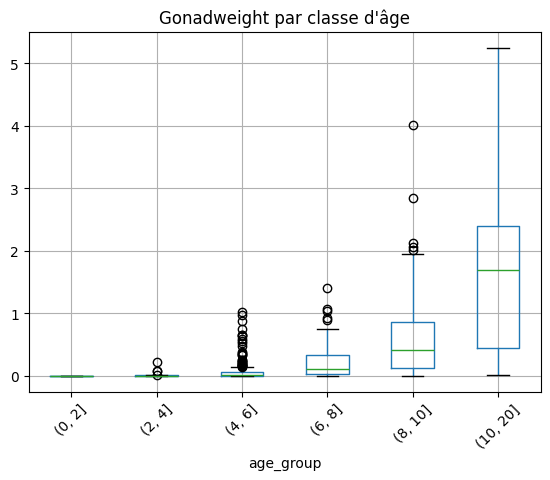

In [9041]:
df['age_group'] = pd.cut(df['age'], bins=[0,2,4,6,8,10,20])

df.boxplot(column='gonadweight', by='age_group')
plt.title("Gonadweight par classe d'âge")
plt.suptitle("")
plt.xticks(rotation=45)
plt.show()


Interprétation :

- Le poids des gonades augmente globalement avec l’âge, confirmant le lien entre maturation sexuelle et vieillissement.
- Les valeurs manquantes sont principalement concentrées chez les jeunes individus.
Cela suggère que les données manquantes sont biologiquement structurées
et non totalement aléatoires.


In [9042]:
numeric_cols = ['weight', 'length', 'age', 'sex', 'stage', 'liverweight', 
                'gonadweight', 'spawningage', 'spawningzones', 'readability', 
                'otolithtype', 'otolithedge']
correlation_matrix = df[numeric_cols].corr()
print("Corrélations avec gonadweight:")
print(correlation_matrix['gonadweight'].sort_values(ascending=False))

Corrélations avec gonadweight:
gonadweight      1.000000
weight           0.845630
liverweight      0.789251
length           0.667177
age              0.663624
spawningzones    0.521672
spawningage      0.401626
stage            0.269886
readability      0.140592
otolithtype      0.072512
otolithedge      0.038559
sex             -0.270600
Name: gonadweight, dtype: float64


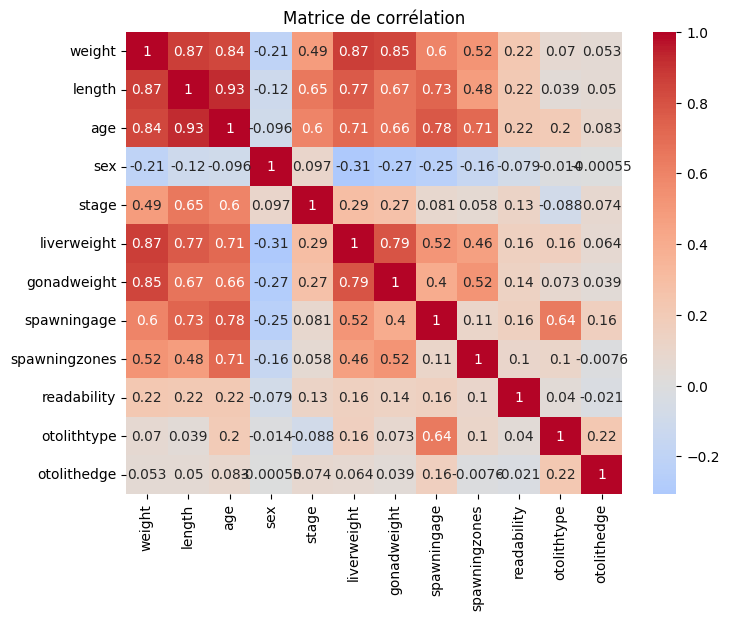

In [9043]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de corrélation')
plt.show()

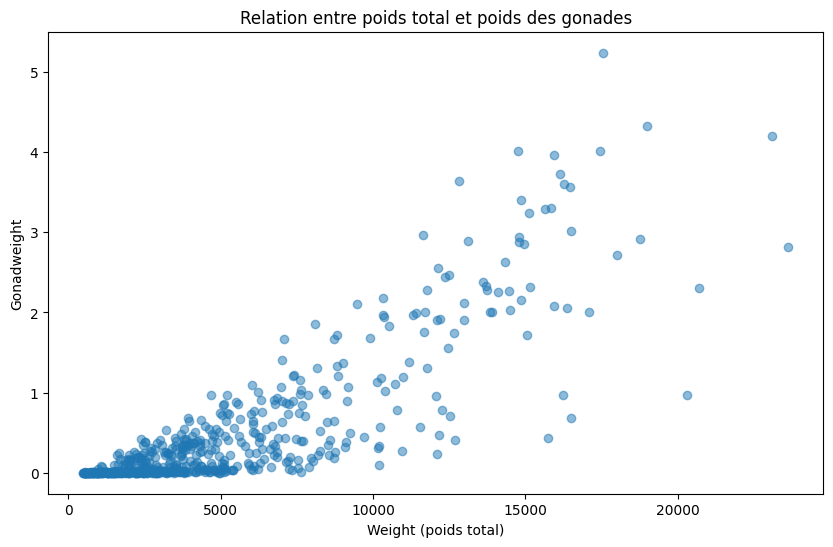

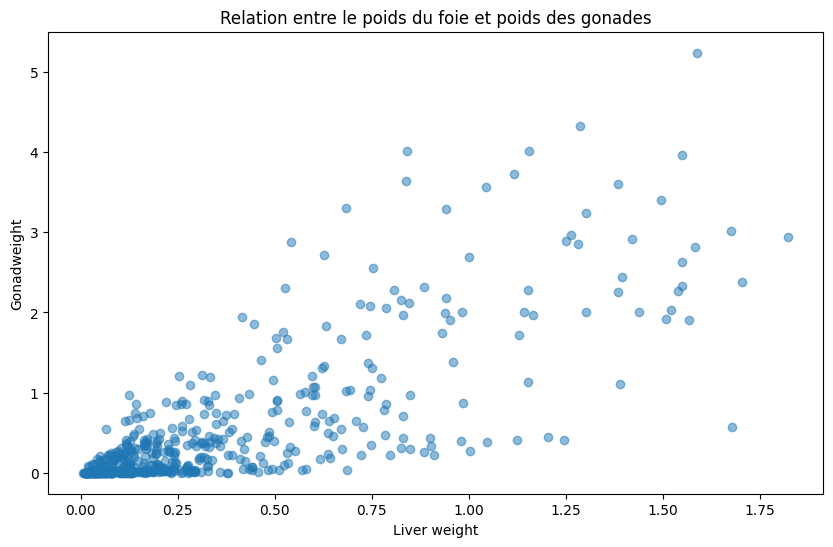

In [9044]:
# Par weight
plt.figure(figsize=(10, 6))
plt.scatter(df['weight'], df['gonadweight'], alpha=0.5)
plt.xlabel('Weight (poids total)')
plt.ylabel('Gonadweight')
plt.title('Relation entre poids total et poids des gonades')
plt.show()

# Par liverweight
plt.figure(figsize=(10, 6))
plt.scatter(df['liverweight'], df['gonadweight'], alpha=0.5)
plt.xlabel('Liver weight')
plt.ylabel('Gonadweight')
plt.title('Relation entre le poids du foie et poids des gonades')
plt.show()

- La variable gonadweight présente une forte corrélation avec weight (0.845) et liverweight (0.789), indiquant une dépendance biologique cohérente.

In [9045]:
df_imputed = df.copy()
df_imputed['gonadweight'] = df_imputed['gonadweight'].astype('float64') 
print(f"Valeurs manquantes avant imputation : {df_imputed['gonadweight'].isna().sum()}")

Valeurs manquantes avant imputation : 420


f) Imputation par régression linéaire

In [9046]:
# Vars corrélées
features = ['weight', 'length', 'liverweight']

# Séparer train et predict
train = df_imputed[df_imputed['gonadweight'].notna()].dropna(subset=features)
predict = df_imputed[df_imputed['gonadweight'].isna()].dropna(subset=features)

# Régression linéaire
model = LinearRegression()
model.fit(train[features], train['gonadweight'])
predictions = model.predict(predict[features])
predictions = np.clip(predictions, 0.001, None) #éviter les vals negatives

# Remplir les vals prédites
df_imputed.loc[predict.index, 'gonadweight'] = predictions

# Pour les autres vals manquantes restantes
df_imputed['gonadweight'] = df_imputed['gonadweight'].fillna(df_imputed['gonadweight'].median())


In [9047]:
df_imputed['gonadweight'].describe()

count    1007.000000
mean        0.421873
std         0.684081
min         0.001000
25%         0.020004
50%         0.188965
75%         0.455444
max         5.238281
Name: gonadweight, dtype: float64

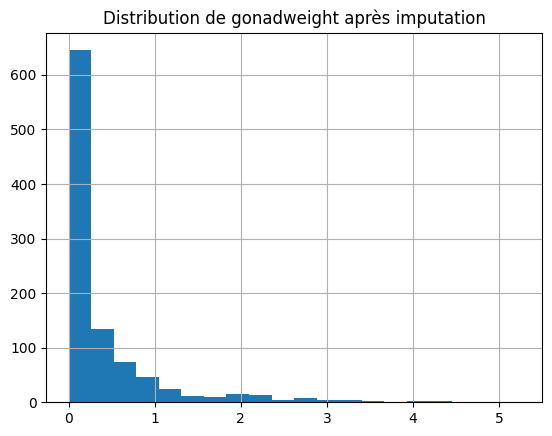

In [9048]:
df_imputed['gonadweight'].hist(bins=20)
plt.title('Distribution de gonadweight après imputation')
plt.show()

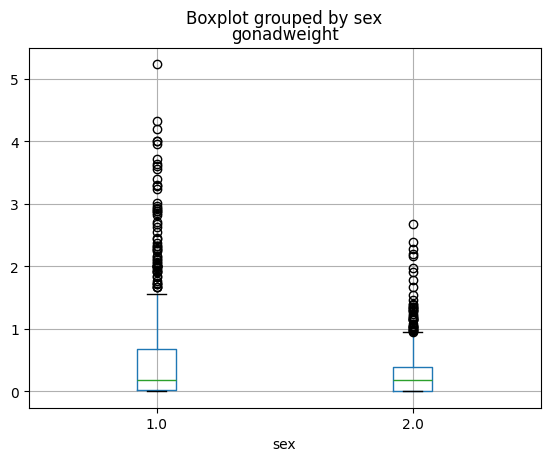

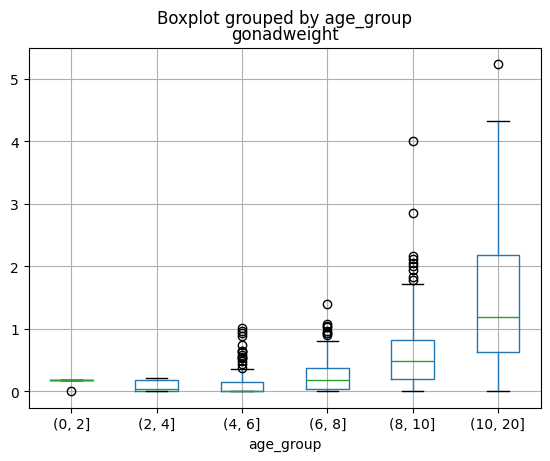

In [9049]:
df_imputed.boxplot(column='gonadweight', by='sex')
df_imputed.boxplot(column='gonadweight', by='age_group')
plt.show()

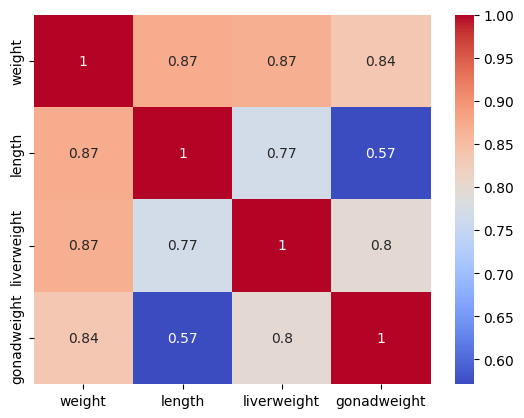

In [9050]:
numeric_cols = ['weight', 'length', 'liverweight', 'gonadweight']
corr_matrix = df_imputed[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [9051]:
df_imputed.groupby('sex')['gonadweight'].agg(['mean','median'])

,mean,median
sex,,
1.0,0.577674,0.188965
2.0,0.303861,0.188965


In [9052]:
df_imputed.isnull().sum().sort_values(ascending=False)

spawningzones    408
spawningage      408
liverweight      165
stage             56
sex               46
otolithtype       30
weightmethod       3
weight             3
age                2
otolithedge        2
age_group          2
length             0
serialno           0
no                 0
samplenumber       0
gonadweight        0
lengthunit         0
aphia              0
noname             0
species            0
readability        0
SpecCat            0
platform           0
cruise             0
dtype: int64

 <h3> Évaluation de la colonne "spawningzones" <h3>

1) Étude statistique de `spawningzones`

`spawningzones` :
Analyser la distribution, les valeurs manquantes et la relation avec l’âge, le sexe et d’autres variables biologiques.
- spawningzones correspond à la zone de frai (0-8) où le poisson dépose ses œufs. Les valeurs manquantes concernent surtout les poissons immatures ou stériles.

In [9053]:
nb_total=len(df_imputed)
nb_valeurs=df_imputed['spawningzones'].notna().sum()
nb_nan=df_imputed['spawningzones'].isna().sum()
taux_de_remp=(nb_valeurs/nb_total)*100
taux_manquant=(nb_nan/nb_total)*100
print(f"Total d'observation: {nb_total}")
print(f"valeurs présentes : {taux_de_remp:.2f}%")
print(f"Valeurs manquantes: {taux_manquant:.2f}%")

Total d'observation: 1007
valeurs présentes : 59.48%
Valeurs manquantes: 40.52%


- Ces zones sont importantes pour la survie des œufs et la réussite de la reproduction.

- Dans le dataset: Pour beaucoup d’individus, cette information n’a pas été mesurée ou n’était pas applicable (jeunes poissons immatures ou stériles), d’où les valeurs manquantes.

b) Distribution des valeurs présentes

In [9054]:
print(df_imputed['spawningzones'].value_counts(dropna=False))

spawningzones
NaN    408
0.0    286
1.0    153
2.0     72
3.0     36
4.0     25
5.0     13
6.0      7
7.0      4
8.0      3
Name: count, dtype: int64


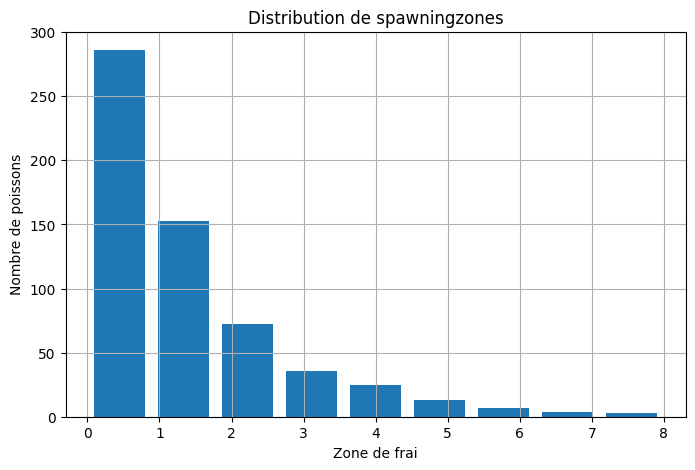

In [9055]:
plt.figure(figsize=(8,5))
df_imputed['spawningzones'].dropna().hist(bins=9, rwidth=0.8)
plt.title("Distribution de spawningzones")
plt.xlabel("Zone de frai")
plt.ylabel("Nombre de poissons")
plt.show()

Observation :

- Zone dominante : 0 → poissons immatures ou non reproducteurs

- Zones 1 à 8 → zones de reproduction spécifiques

c) Distribution selon le sexe

In [9056]:
cross_tab = pd.crosstab(df_imputed['sex'].fillna(-1), df_imputed['spawningzones'].isna(), margins=True)
print(cross_tab)

spawningzones  False  True   All
sex                             
-1.0               0    46    46
 1.0             265   189   454
 2.0             334   173   507
 All             599   408  1007


- 40,5% de données manquantes au total (408/1007). 
- Les femelles ont 41,6% de manquants, les mâles 34,1%. 
- Tous les individus de sexe inconnu ont des zones de frai manquantes.

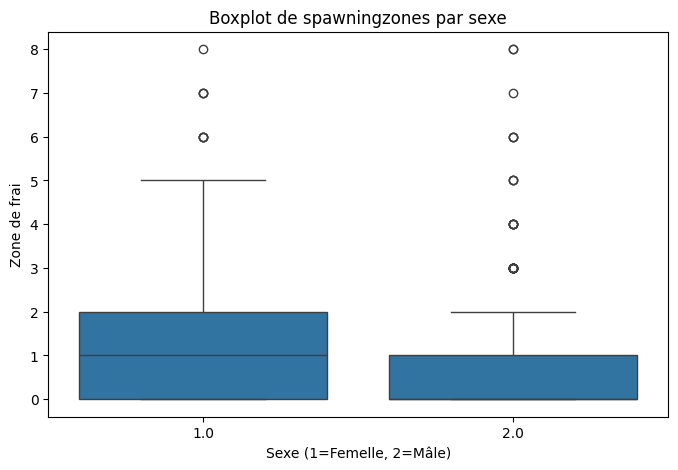

In [9057]:
plt.figure(figsize=(8,5))
sns.boxplot(x='sex', y='spawningzones', data=df_imputed)
plt.title("Boxplot de spawningzones par sexe")
plt.xlabel("Sexe (1=Femelle, 2=Mâle)")
plt.ylabel("Zone de frai")
plt.show()

Distributions similaires entre femelles et mâles. Médiane ~1 pour les deux sexes, avec des outliers allant de 3 à 8. Pas de différence majeure entre les sexes.

e) Distribution selon l'âge

In [9058]:
df['age_group'] = pd.cut(df_imputed['age'], bins=[0,1,2,3,4,5,6,7,8,9,10,20], right=False)
missing_by_age = df.groupby('age_group')['spawningzones'].apply(lambda x: x.isna().mean() * 100)
print(missing_by_age)

age_group
[0, 1)             NaN
[1, 2)      100.000000
[2, 3)      100.000000
[3, 4)       98.437500
[4, 5)       85.365854
[5, 6)       68.888889
[6, 7)       52.755906
[7, 8)       29.655172
[8, 9)        7.563025
[9, 10)       7.526882
[10, 20)      0.990099
Name: spawningzones, dtype: float64


C:\Users\pc\AppData\Local\Temp\ipykernel_14948\3572876410.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  missing_by_age = df.groupby('age_group')['spawningzones'].apply(lambda x: x.isna().mean() * 100)


- Pattern très net - 100% de manquants avant 3 ans, diminution progressive jusqu'à <10% après 8 ans, et seulement 1% après 10 ans. 
- L'âge est le facteur déterminant des données manquantes.

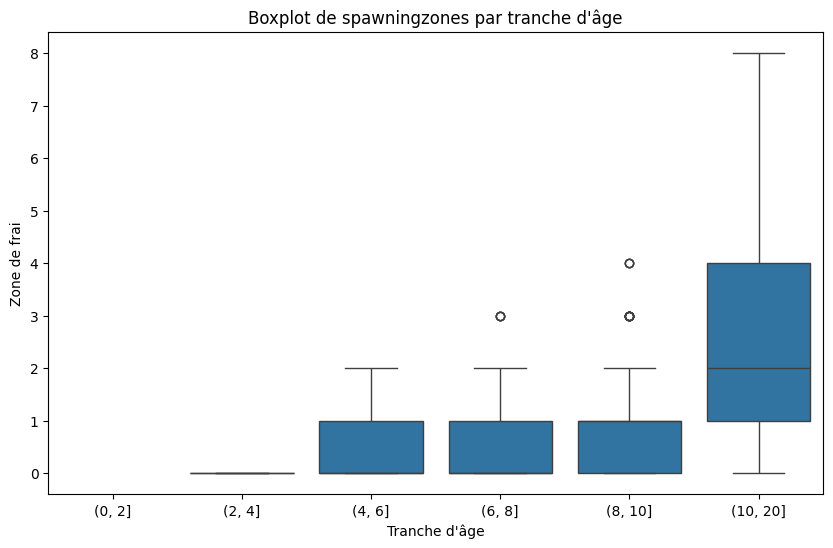

In [9059]:
plt.figure(figsize=(10,6))
sns.boxplot(x='age_group', y='spawningzones', data=df_imputed)
plt.title("Boxplot de spawningzones par tranche d'âge")
plt.xlabel("Tranche d'âge")
plt.ylabel("Zone de frai")
plt.show()

- Les zones de frai augmentent avec l'âge. 
- Jeunes poissons (4-8 ans) : zones 0-1. Adultes (10-20 ans) : médiane à 2, distribution large (0-8). Cohérent avec la maturité sexuelle croissante.

f) Corrélations numériques

In [9060]:
numeric_cols = ['weight', 'length', 'age', 'sex', 'stage', 'liverweight', 
                'gonadweight', 'spawningage', 'spawningzones', 'readability', 
                'otolithtype', 'otolithedge']
correlation_matrix_z = df_imputed[numeric_cols].corr()
print("Corrélations avec spawningzones:")
print(correlation_matrix['spawningzones'].sort_values(ascending=False))

Corrélations avec spawningzones:
spawningzones    1.000000
age              0.709553
weight           0.522106
gonadweight      0.521672
length           0.479522
liverweight      0.463356
spawningage      0.106841
otolithtype      0.102634
readability      0.100606
stage            0.058316
otolithedge     -0.007605
sex             -0.159182
Name: spawningzones, dtype: float64


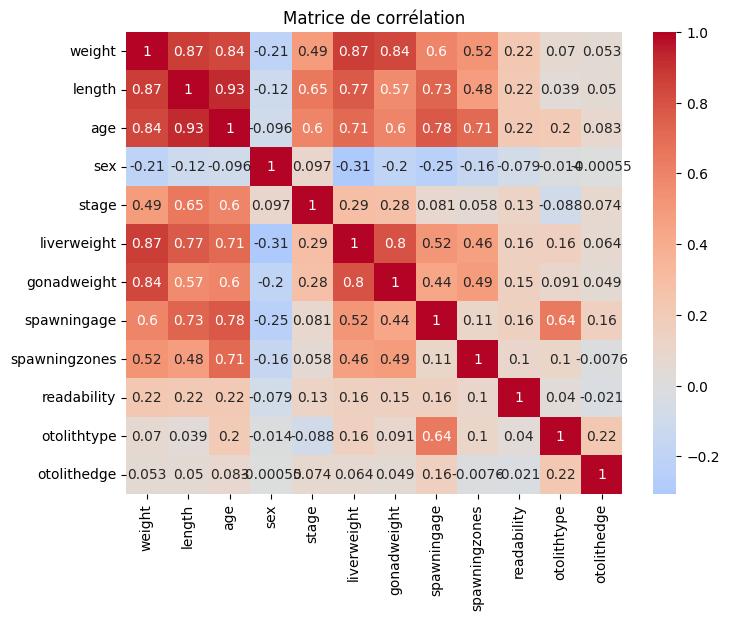

In [9061]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_z, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de corrélation')
plt.show()

Observation :

- Variables corrélées : age (0.71), weight (0.52), gonadweight (0.52)

- Sexe a corrélation faible (-0.16)

- La corrélation avec age permet de guider l’imputation sans fuite

g) Imputation de `spawningzones`

On va faire une imputation basée sur les variables corrélées : weight, length, gonadweight, liverweight.


In [9062]:
# Features corrélées
features_corr = ['weight', 'length', 'gonadweight']

# Séparer train et predict
train = df_imputed[df_imputed['spawningzones'].notna()].dropna(subset=features_corr)
predict = df_imputed[df_imputed['spawningzones'].isna()].dropna(subset=features_corr)

# Régression linéaire
model = LinearRegression()
model.fit(train[features_corr], train['spawningzones'])
predictions = model.predict(predict[features_corr])

# ⚡ Convertir en int et clipper dans [0,8]
predictions_int = np.round(predictions).astype(int)
predictions_int = np.clip(predictions_int, 0, 8)

# Remplir les valeurs prédites
df_imputed.loc[predict.index, 'spawningzones'] = predictions_int

# Pour les NaN restantes (immatures)
df_imputed['spawningzones'] = df_imputed['spawningzones'].fillna(0).astype(int)

In [9063]:
print(f"Vals manquantes après imputation : {df_imputed['spawningzones'].isna().sum()}")

Vals manquantes après imputation : 0


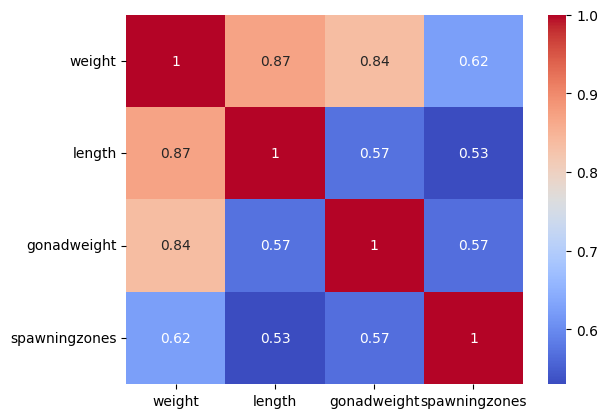

In [9064]:
numeric_cols = ['weight', 'length', 'gonadweight', 'spawningzones']
corr_matrix = df_imputed[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [9065]:
df_imputed.isnull().sum().sort_values(ascending=False)

spawningage      408
liverweight      165
stage             56
sex               46
otolithtype       30
weight             3
weightmethod       3
otolithedge        2
age                2
age_group          2
length             0
no                 0
serialno           0
samplenumber       0
aphia              0
gonadweight        0
lengthunit         0
noname             0
species            0
spawningzones      0
readability        0
SpecCat            0
platform           0
cruise             0
dtype: int64

 <h3> Évaluation de la colonne "spawningage" <h3>

1) Étude statistique de `spawningage`

`spawningage` : Analyser la distribution, les valeurs manquantes, la relation avec les autres variables
et évaluer la pertinence biologique de cette variable.

a) Analyse des valeurs manquantes

In [9066]:
nb_total=len(df)
nb_valeurs=df_imputed['spawningage'].notna().sum()
nb_nan=df_imputed['spawningage'].isna().sum()
taux_de_remp=(nb_valeurs/nb_total)*100
taux_manquant=(nb_nan/nb_total)*100
print(f"Total d'observation: {nb_total}")
print(f"valeurs présentes : {taux_de_remp:.2f}%")
print(f"Valeurs manquantes: {taux_manquant:.2f}%")

Total d'observation: 1007
valeurs présentes : 59.48%
Valeurs manquantes: 40.52%


Une partie importante des données est manquante. Comme pour gonadweight, cela peut être normal pour les poissons immatures ou pour ceux dont la mesure n’a pas été faite.

b) Statistiques descriptives

In [9067]:
df_imputed['spawningage'].describe()

count    599.000000
mean       7.625000
std        1.707031
min        3.000000
25%        7.000000
50%        8.000000
75%        9.000000
max       12.000000
Name: spawningage, dtype: float64

- Moyenne / médiane : 7,6 / 8 d'où la distribution est centrée autour de 7-8 ans.

- Étendue : 3 à 12 ans cela veut dire que certains poissons commencent très tôt, d’autres plus tard.

- Quartiles : 25% ≤ 7, 50% = 8, 75% = 9 donc la majorité des poissons se 

- La variable est concentrée sur les poissons matures, avec des jeunes poissons manquants (logique biologique). Les valeurs extrêmes sont peu nombreuses mais biologiquement plausibles.

In [9068]:
print("Valeur minimale :", df_imputed['spawningage'].min())
print("Valeur maximale :", df_imputed['spawningage'].max())

Valeur minimale : 3.0
Valeur maximale : 12.0


c) Distribution des valeurs présentes

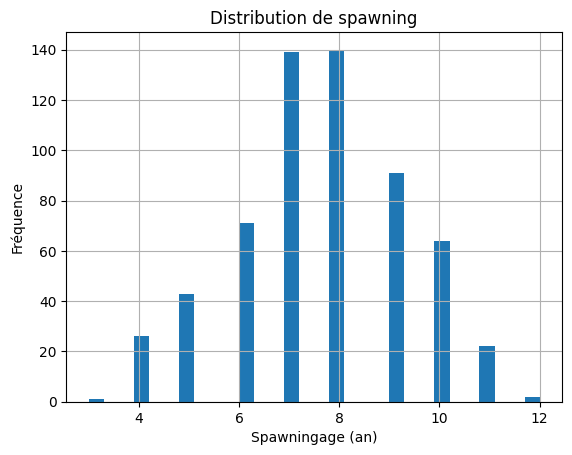

In [9069]:
df_imputed['spawningage'].dropna().hist(bins=30)
plt.title("Distribution de spawning")
plt.xlabel("Spawningage (an)")
plt.ylabel("Fréquence")
plt.show()

La distribution montre un pic de reproduction à 7-8 ans (~140 individus), avec une activité reproductive concentrée entre 6 et 10 ans. La courbe présente une asymétrie avec une montée abrupte depuis les jeunes âges et une décroissance progressive vers les âges avancés, caractéristique d'une espèce à maturité sexuelle tardive.

d) Distribution selon le sexe

In [9070]:
df_imputed['sex'] = df_imputed['sex'].astype('float32')
df_imputed['gonadweight'] = df_imputed['gonadweight'].astype('float32')
stats_by_sex = df_imputed.groupby('sex')['spawningage'].agg(['count', 'mean', 'std'])
print(stats_by_sex)

     count      mean       std
sex                           
1.0    265  8.094339  1.661326
2.0    334  7.248503  1.651621


Les femelles (sexe 1.0) présentent un âge de reproduction moyen de 8.09 ans (±1.66), légèrement supérieur aux mâles (sexe 2.0) qui se reproduisent en moyenne à 7.25 ans (±1.65).

In [9071]:
cross_tab = pd.crosstab(df_imputed['sex'].fillna(-1), df_imputed['spawningage'].isna(), margins=True)
print(cross_tab)

spawningage  False  True   All
sex                           
-1.0             0    46    46
 1.0           265   189   454
 2.0           334   173   507
 All           599   408  1007


- Les 46 poissons sans sexe connu sont probablement juvéniles immatures donc pas de spawningage.
- Pour les femelles et mâles, certaines valeurs sont manquantes mais ce n’est pas une erreur : soit immatures, soit mesure non effectuée.

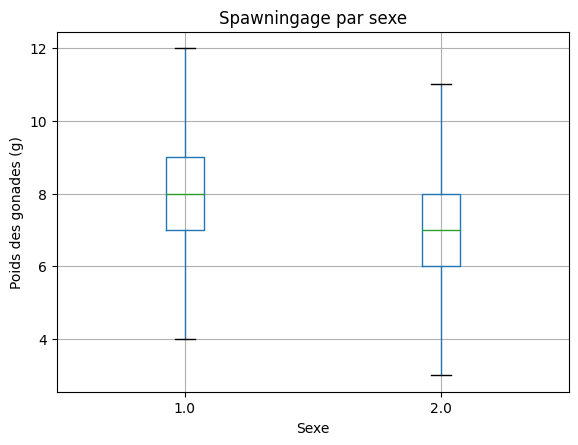

In [9072]:
df_imputed.boxplot(column='spawningage', by='sex')
plt.title("Spawningage par sexe")
plt.suptitle("")
plt.xlabel("Sexe")
plt.ylabel("Poids des gonades (g)")
plt.show()

Le boxplot confirme la différence d'âge de reproduction entre sexes. Les femelles montrent une médiane et une distribution légèrement décalées vers des âges plus élevés, avec des dispersions comparables. Quelques valeurs extrêmes sont observées pour les mâles (jusqu'à 11 ans).

e) Corrélation numérique

In [9073]:
numeric_cols = ['weight', 'length', 'age', 'sex', 'stage', 'liverweight', 
                'gonadweight', 'spawningage', 'spawningzones', 'readability', 
                'otolithtype', 'otolithedge']
correlation_matrix_a = df[numeric_cols].corr()
print("Corrélations avec spawningage:")
print(correlation_matrix['spawningage'].sort_values(ascending=False))

Corrélations avec spawningage:
spawningage      1.000000
age              0.776428
length           0.725835
otolithtype      0.639693
weight           0.595879
liverweight      0.517561
gonadweight      0.401626
otolithedge      0.162124
readability      0.156570
spawningzones    0.106841
stage            0.080717
sex             -0.246294
Name: spawningage, dtype: float64


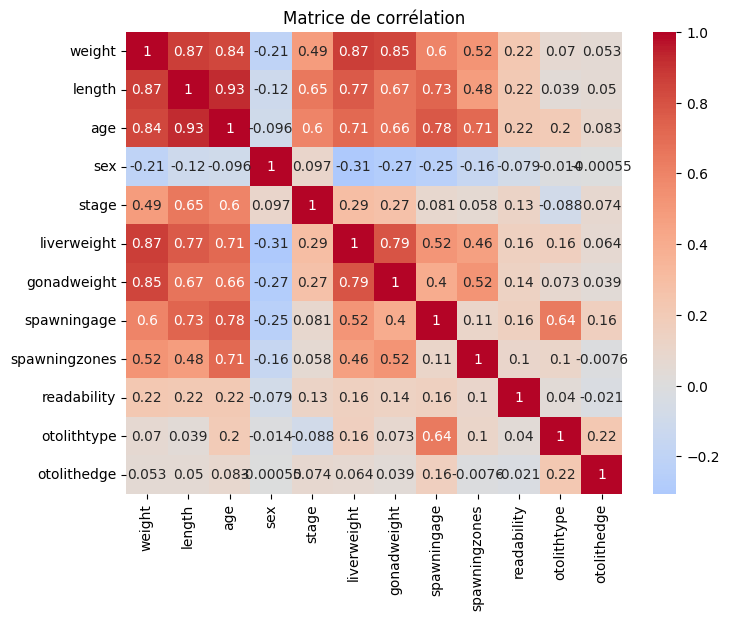

In [9074]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_a, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de corrélation')
plt.show()

In [9075]:
mask_outliers = (df_imputed['spawningage'] < 4) | (df_imputed['spawningage'] > 11)
df_imputed.loc[mask_outliers, 'spawningage'] = np.nan
print(f"{mask_outliers.sum()} valeurs aberrantes remplacées par NaN")

3 valeurs aberrantes remplacées par NaN


-Critère biologique : spawningage < 5 ans ou > 11 ans peuvent être considérés comme aberrants.

-On peut les remplacer par NaN pour les traiter dans l’imputation, afin de ne pas biaiser le modèle.

f) Imputation en évitant le Data Leakage

In [9076]:
# Features sûres (pas age ni sex pour éviter data leakage)
features = ['weight', 'length', 'otolithtype']

# Séparer train et prédiction
train = df_imputed[df_imputed['spawningage'].notna()].dropna(subset=features)
X_train = train[features]
y_train = train['spawningage']

predict = df_imputed[df_imputed['spawningage'].isna()].dropna(subset=features)
X_predict = predict[features]

# Imputation par régression linéaire si assez de données 
if len(predict) > 0 and len(train) >= 10:
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_predict)
    
    # spawningage ne peut pas dépasser l'âge actuel
    max_age = df_imputed.loc[predict.index, 'age'].values
    predictions = np.clip(predictions, 1, max_age)
    
    # Remplir les valeurs prédites
    df_imputed.loc[predict.index, 'spawningage'] = predictions
    
    # R² sur l'ensemble d'entraînement
    r2 = model.score(X_train, y_train)
    print(f"{len(predict)} valeurs imputées par régression (R²={r2:.3f})")

# Pour les valeurs restantes (si NaN) : remplir avec la médiane
median_spawn_age = df_imputed['spawningage'].median()
df_imputed['spawningage'] = df_imputed['spawningage'].fillna(median_spawn_age)

381 valeurs imputées par régression (R²=0.350)


In [9077]:
df_imputed.isnull().sum().sort_values(ascending=False)

liverweight      165
stage             56
sex               46
otolithtype       30
weight             3
weightmethod       3
otolithedge        2
age                2
age_group          2
no                 0
length             0
samplenumber       0
serialno           0
aphia              0
noname             0
gonadweight        0
lengthunit         0
species            0
spawningage        0
spawningzones      0
readability        0
SpecCat            0
platform           0
cruise             0
dtype: int64

 <h3> Évaluation de la colonne "liverweight" <h3>

1. Étude statistique de la variable `liverweight`

`Objectif` :
Analyser la distribution, les valeurs manquantes, la relation avec les autres variables
et évaluer la pertinence biologique de cette variable.


a) Analyse des valeurs manquantes

In [9078]:
nb_total=len(df)
nb_valeurs=df_imputed['liverweight'].notna().sum()
nb_nan=df_imputed['liverweight'].isna().sum()
taux_de_remp=(nb_valeurs/nb_total)*100
taux_manquant=(nb_nan/nb_total)*100
print(f"Total d'observation: {nb_total}")
print(f"valeurs présentes : {taux_de_remp:.2f}%")
print(f"Valeurs manquantes: {taux_manquant:.2f}%")

Total d'observation: 1007
valeurs présentes : 83.61%
Valeurs manquantes: 16.39%


16% des données pour liverweight sont manquantes. Cela reste un taux relativement faible et majoritairement lié à des poissons jeunes ou immatures.

b) Statistiques descriptives

In [9079]:
df_imputed['liverweight'].describe()

count    842.000000
mean       0.296875
std        0.332764
min        0.000000
25%        0.077026
50%        0.166992
75%        0.372559
max        1.823242
Name: liverweight, dtype: float64

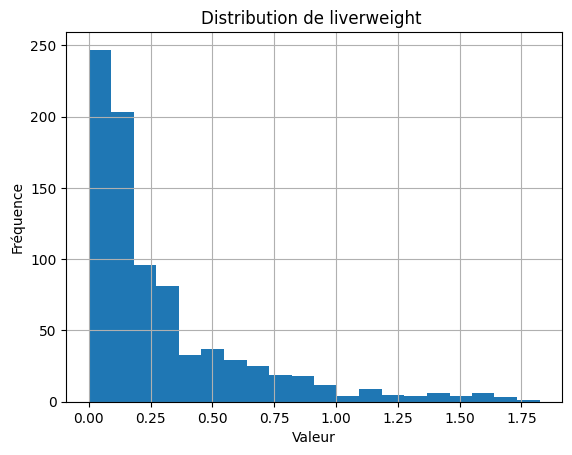

In [9080]:
df_imputed['liverweight'].dropna().hist(bins=20)
plt.title('Distribution de liverweight ')
plt.xlabel('Valeur')
plt.ylabel('Fréquence')
plt.show()

La distribution du poids du foie est fortement asymétrique avec une concentration massive des valeurs faibles. La médiane est de 0.17 kg, avec 75% des individus sous 0.37 kg, tandis que la moyenne (0.30 kg) est tirée vers le haut par quelques valeurs extrêmes (max = 1.82 kg). Cette distribution très asymétrique à droite suggère une population majoritairement composée de petits individus avec quelques spécimens de taille nettement supérieure.
Les poissons jeunes ont naturellement un foie plus petit, ce qui explique certaines valeurs proches de zéro.

In [9081]:
print("Valeur minimale :", df_imputed['liverweight'].min())
print("Valeur maximale :", df_imputed['liverweight'].max())

Valeur minimale : 0.0
Valeur maximale : 1.823


d) Distribution selon le sexe

In [9082]:
df_imputed['sex'] = df_imputed['sex'].astype('float32')
df_imputed['liverweight'] = df['liverweight'].astype('float32')
stats_by_sex = df_imputed.groupby('sex')['liverweight'].agg(['count', 'mean', 'std'])
print(stats_by_sex)

     count      mean       std
sex                           
1.0    395  0.405142  0.409182
2.0    446  0.201417  0.203038


Les femelles présentent un poids de foie moyen nettement supérieur (0.41 kg ±0.41) comparé aux mâles avec 0.20 kg (±0.20). Cette différence marquée (environ 2x) suggère un dimorphisme sexuel significatif. 

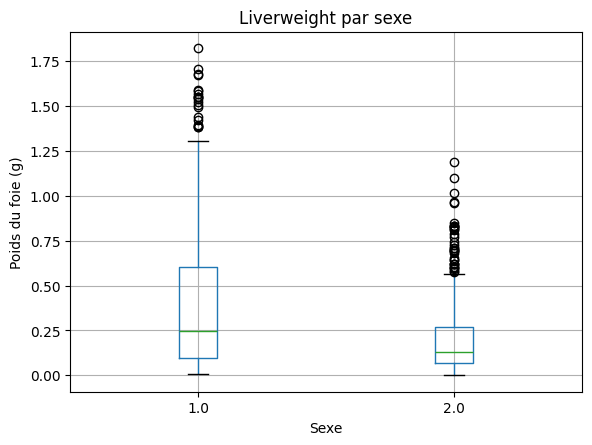

In [9083]:
df.boxplot(column='liverweight', by='sex')
plt.title("Liverweight par sexe")
plt.suptitle("")
plt.xlabel("Sexe")
plt.ylabel("Poids du foie (g)")
plt.show()

Le boxplot confirme la différence importante entre sexes. Les femelles montrent une médiane, des quartiles et une dispersion tous supérieurs aux mâles. La distribution des femelles présente également plus de valeurs extrêmes élevées, cohérent avec leur plus grande variabilité.

In [9084]:
cross_tab = pd.crosstab(df_imputed['sex'].fillna(-1),df_imputed['liverweight'].isna(), margins=True)
print(cross_tab)

pct_femelles = (stats_by_sex.loc[1.0, 'count'] / 454) * 100
pct_males = (stats_by_sex.loc[2.0, 'count'] / 507) * 100
print(f"Femelles avec données : {pct_femelles:.1f}%")
print(f"Mâles avec données : {pct_males:.1f}%")

liverweight  False  True   All
sex                           
-1.0             1    45    46
 1.0           395    59   454
 2.0           446    61   507
 All           842   165  1007
Femelles avec données : 87.0%
Mâles avec données : 88.0%


Les données de poids du foie sont disponibles pour 842 individus sur 1007 (83.6%). Le taux de complétude est similaire entre sexes : 87.0% pour les femelles et 88.0% pour les mâles. Seules 165 observations manquent cette information, dont 45 individus de sexe non déterminé

g) Etude de corrélation numérique

In [9085]:
numeric_cols = ['weight', 'length', 'age', 'sex', 'stage', 'liverweight', 
                'gonadweight', 'spawningage', 'spawningzones', 'readability', 
                'otolithtype', 'otolithedge']
correlation_matrix_l = df_imputed[numeric_cols].corr()
print("Corrélations avec liverweight:")
print(correlation_matrix['liverweight'].sort_values(ascending=False))

Corrélations avec liverweight:
liverweight      1.000000
weight           0.867996
gonadweight      0.789251
length           0.768753
age              0.713748
spawningage      0.517561
spawningzones    0.463356
stage            0.292121
otolithtype      0.159359
readability      0.157008
otolithedge      0.063934
sex             -0.305742
Name: liverweight, dtype: float64


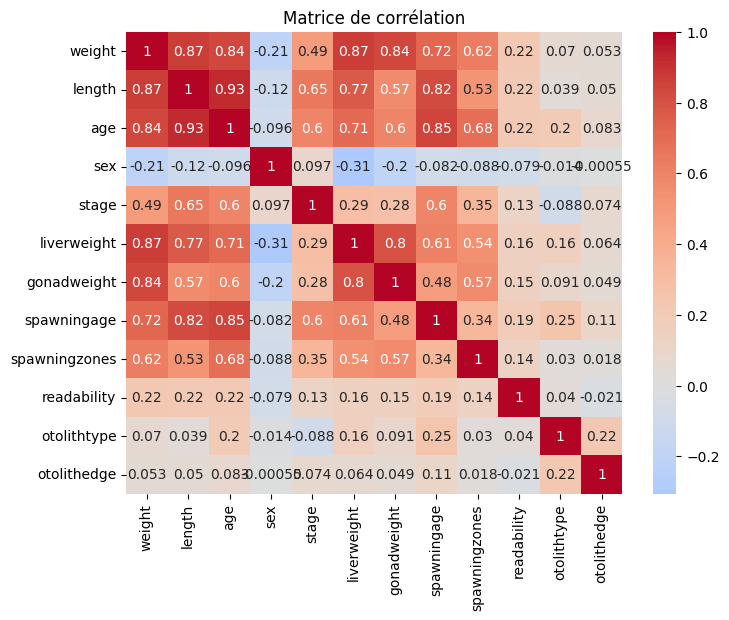

In [9086]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_l, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de corrélation')
plt.show()

e) Imputation des valeurs manquantes

In [9087]:
# Features 
features = ['weight', 'length', 'gonadweight']

# Train et prédiction
train = df_imputed[df_imputed['liverweight'].notna()].dropna(subset=features)
X_train = train[features]
y_train = train['liverweight']

predict = df_imputed[df_imputed['liverweight'].isna()].dropna(subset=features)
X_predict = predict[features]

if len(predict) > 0 and len(train) >= 10:
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_predict)
    
    # Remplir les valeurs prédites
    df_imputed.loc[predict.index, 'liverweight'] = predictions
    
    r2 = model.score(X_train, y_train)
    print(f"{len(predict)} valeurs imputées pour liverweight (R²={r2:.3f})")

# Remplir les valeurs restantes avec la médiane
median_liver = df_imputed['liverweight'].median()
df_imputed['liverweight'] = df_imputed['liverweight'].fillna(median_liver)

print(f"Valeurs manquantes restantes : {df_imputed['liverweight'].isna().sum()}")


165 valeurs imputées pour liverweight (R²=0.758)
Valeurs manquantes restantes : 0


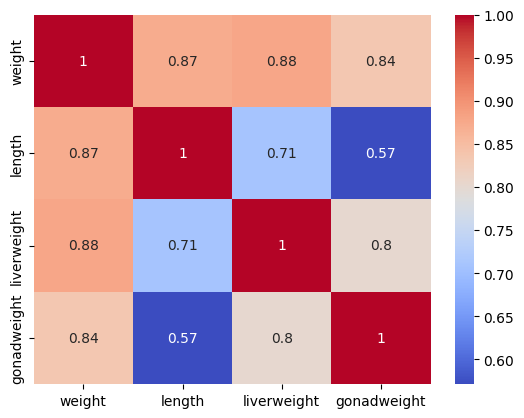

In [9088]:
numeric_cols = ['weight', 'length', 'liverweight', 'gonadweight']
corr_matrix = df_imputed[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

 <h3> Évaluation de la colonne "stage" <h3>

1) Étude statistique de `stage`

`stage` :
Analyser la distribution, les valeurs manquantes et la relation avec l’âge, le sexe et d’autres variables biologiques.

In [9089]:
nb_total=len(df)
nb_valeurs=df_imputed['stage'].notna().sum()
nb_nan=df_imputed['stage'].isna().sum()
taux_de_remp=(nb_valeurs/nb_total)*100
taux_manquant=(nb_nan/nb_total)*100
print(f"Total d'observation: {nb_total}")
print(f"valeurs présentes : {taux_de_remp:.2f}%")
print(f"Valeurs manquantes: {taux_manquant:.2f}%")

Total d'observation: 1007
valeurs présentes : 94.44%
Valeurs manquantes: 5.56%


-Sur 1007 observations, seulement 56 valeurs sont manquantes (~5,56%).


2.Etude statistique

b) Distribution des valeurs présentes

In [9090]:
print(df_imputed['spawningzones'].value_counts(dropna=False))

spawningzones
0    659
1    184
2     75
3     36
4     26
5     13
6      7
7      4
8      3
Name: count, dtype: int64


In [9091]:
df_imputed['stage'].describe()

count    951.000000
mean       2.376953
std        1.187500
min        1.000000
25%        1.000000
50%        3.000000
75%        3.000000
max        5.000000
Name: stage, dtype: float64

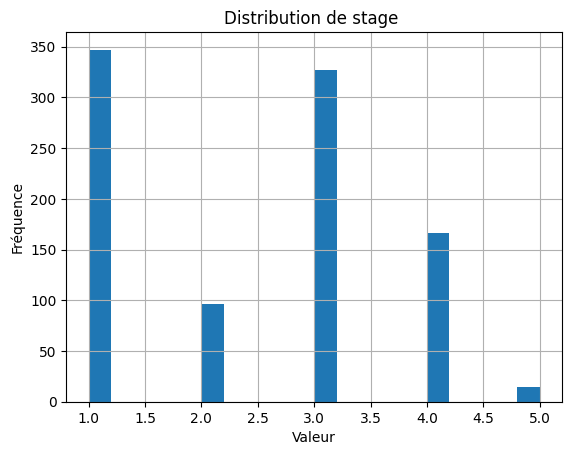

In [9092]:
df_imputed['stage'].dropna().hist(bins=20)
plt.title('Distribution de stage ')
plt.xlabel('Valeur')
plt.ylabel('Fréquence')
plt.show()

Les stades vont de 1 à 5.

La majorité des poissons se situent aux stades 1 à 3, ce qui correspond à des poissons jeunes ou en développement

d) Distribution selon l'âge

In [9093]:
missing_by_age = df_imputed.groupby('age_group')['stage'].apply(lambda x: x.isna().mean() * 100)
print(missing_by_age)

age_group
(0, 2]      54.216867
(2, 4]       0.684932
(4, 6]       4.147465
(6, 8]       0.378788
(8, 10]      0.000000
(10, 20]     0.000000
Name: stage, dtype: float64


C:\Users\pc\AppData\Local\Temp\ipykernel_14948\2328046116.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  missing_by_age = df_imputed.groupby('age_group')['stage'].apply(lambda x: x.isna().mean() * 100)


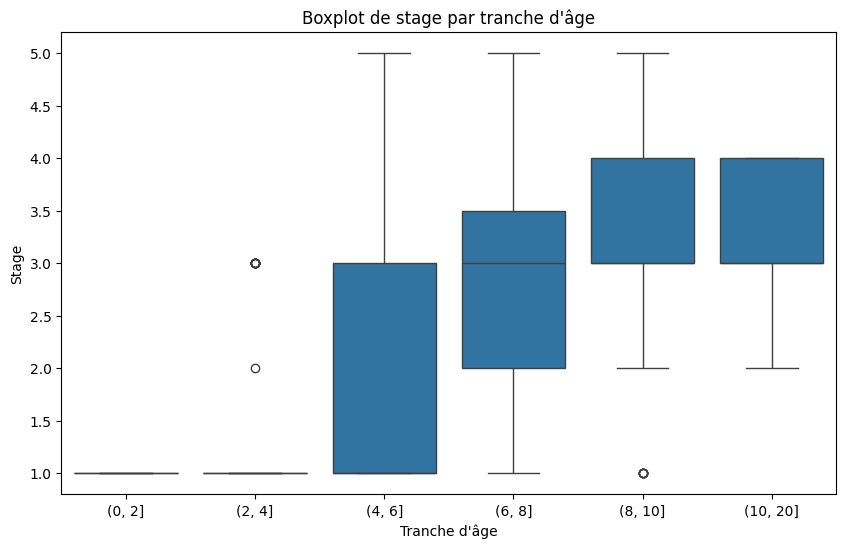

In [9094]:
plt.figure(figsize=(10,6))
sns.boxplot(x='age_group', y='stage', data=df_imputed)
plt.title("Boxplot de stage par tranche d'âge")
plt.xlabel("Tranche d'âge")
plt.ylabel("Stage")
plt.show()

Les NaN sont concentrés chez les poissons très jeunes (<3 ans), ce qui est cohérent avec des stades immatures non encore définis biologiquement.

Pour les adultes (>5 ans), quasiment toutes les valeurs sont présentes.

e) Distribution selon le sexe

In [9095]:
cross_tab = pd.crosstab(df_imputed['sex'].fillna(-1), df_imputed['stage'].isna(), margins=True)
print(cross_tab)

stage  False  True   All
sex                     
-1.0       1    45    46
 1.0     448     6   454
 2.0     502     5   507
 All     951    56  1007


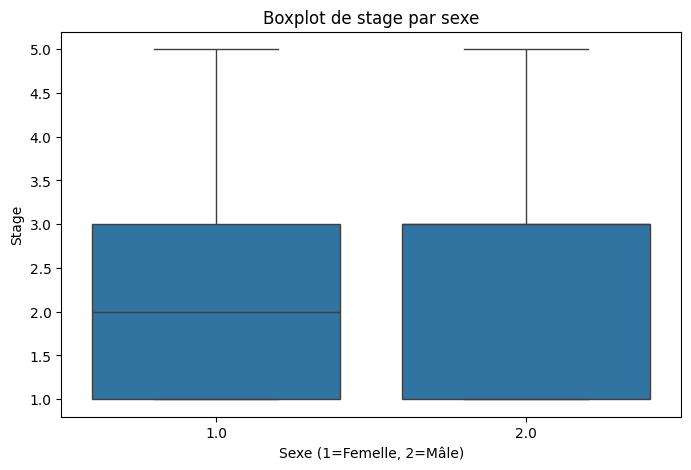

In [9096]:
plt.figure(figsize=(8,5))
sns.boxplot(x='sex', y='stage', data=df_imputed)
plt.title("Boxplot de stage par sexe")
plt.xlabel("Sexe (1=Femelle, 2=Mâle)")
plt.ylabel("Stage")
plt.show()

Les NaN sont surtout chez les juvéniles (-1 = sexe inconnu).

Quelques rares valeurs manquent pour les mâles et femelles adultes, probablement à cause de données biologiques manquantes ou erreurs de collecte.

La colonne stage contient seulement 56 valeurs manquantes ( apeu pres 5,6%), principalement chez les poissons immatures ou très jeunes. Ces absences sont biologiquement cohérentes et ne nécessitent ni suppression ni imputation. La colonne peut être utilisée telle quelle pour l’analyse, avec éventuellement un indicateur de valeurs manquantes pour les modèles prédictifs.

f) Corrélations numériques

In [9097]:
numeric_cols = ['weight', 'length', 'age', 'sex', 'stage', 'liverweight', 
                'gonadweight', 'spawningage', 'spawningzones', 'readability', 
                'otolithtype', 'otolithedge']
correlation_matrix_s= df_imputed[numeric_cols].corr()
print("Corrélations avec stage:")
print(correlation_matrix['stage'].sort_values(ascending=False))

Corrélations avec stage:
stage            1.000000
length           0.650154
age              0.601301
weight           0.489436
liverweight      0.292121
gonadweight      0.269886
readability      0.126428
sex              0.097448
spawningage      0.080717
otolithedge      0.074063
spawningzones    0.058316
otolithtype     -0.088429
Name: stage, dtype: float64


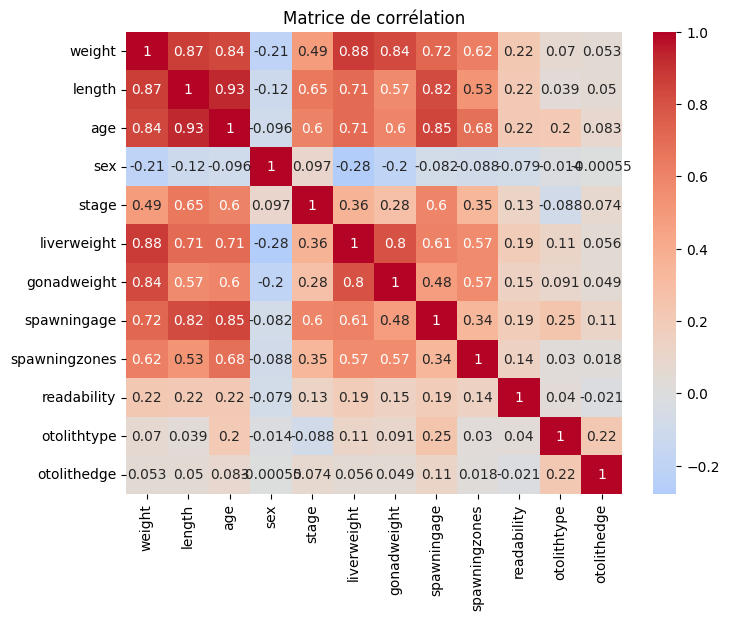

In [9098]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_s, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de corrélation')
plt.show()

In [9099]:
from sklearn.linear_model import LogisticRegression

features = ['length', 'weight']  # features sûres

train = df_imputed[df_imputed['stage'].notna()].dropna(subset=features)
X_train = train[features]
y_train = train['stage'].astype(int)

predict = df_imputed[df_imputed['stage'].isna()].dropna(subset=features)
X_predict = predict[features]

if len(predict) > 0 and len(train) >= 10:
    model = LogisticRegression(multi_class='multinomial', max_iter=1000)
    model.fit(X_train, y_train)
    predictions = model.predict(X_predict)
    
    df_imputed.loc[predict.index, 'stage'] = predictions

# Remplir les dernières valeurs restantes avec le mode global
mode_stage = df_imputed['stage'].mode()[0]
df_imputed['stage'] = df_imputed['stage'].fillna(mode_stage)


c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9100]:
print(f"Vals manquantes après imputation : {df_imputed['stage'].isna().sum()}")

Vals manquantes après imputation : 0


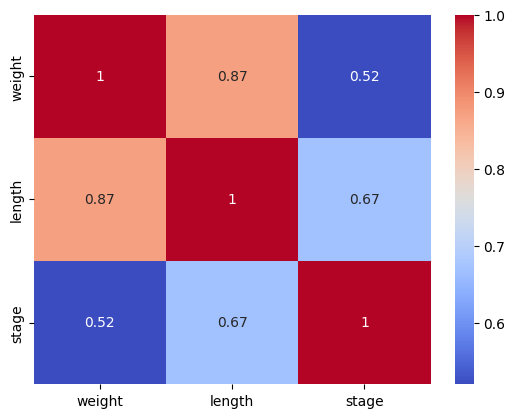

In [9101]:
numeric_cols = ['weight', 'length', 'stage']
corr_matrix = df_imputed[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [9102]:
df_imputed.isnull().sum().sort_values(ascending=False)

sex              46
otolithtype      30
weight            3
weightmethod      3
otolithedge       2
age               2
age_group         2
samplenumber      0
lengthunit        0
platform          0
SpecCat           0
readability       0
spawningzones     0
spawningage       0
species           0
gonadweight       0
no                0
liverweight       0
stage             0
serialno          0
noname            0
length            0
aphia             0
cruise            0
dtype: int64

 <h3> Évaluation de la colonne "sex" <h3>

1) Étude statistique de `stage`

`stage` :
Analyser la distribution, les valeurs manquantes et la relation avec l’âge, le sexe et d’autres variables biologiques.

In [9103]:
nb_total=len(df)
nb_valeurs=df_imputed['sex'].notna().sum()
nb_nan=df['sex'].isna().sum()
taux_de_remp=(nb_valeurs/nb_total)*100
taux_manquant=(nb_nan/nb_total)*100
print(f"Total d'observation: {nb_total}")
print(f"valeurs présentes : {taux_de_remp:.2f}%")
print(f"Valeurs manquantes: {taux_manquant:.2f}%")

Total d'observation: 1007
valeurs présentes : 95.43%
Valeurs manquantes: 4.57%


46 poissons sur 1007 n’ont pas de sexe enregistré → 4,57% de NaN.

Ces valeurs manquantes correspondent très souvent à des juvéniles immatures, pour lesquels le sexe n’est pas déterminable visuellement.

2. Etude statistique

In [9104]:
print(df_imputed['sex'].value_counts(dropna=False))

sex
2.0    507
1.0    454
NaN     46
Name: count, dtype: int64


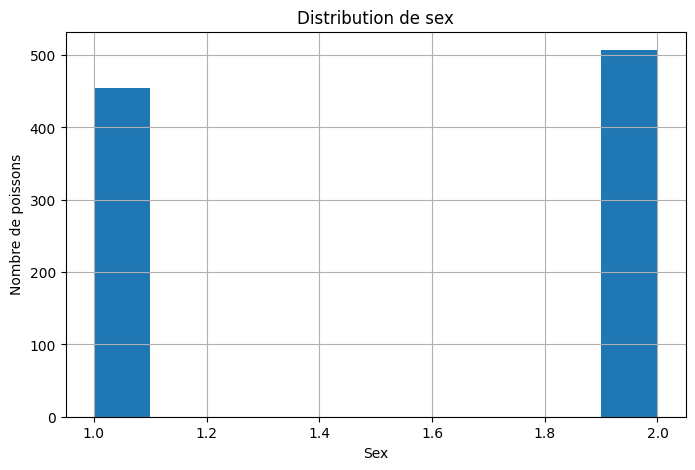

In [9105]:
plt.figure(figsize=(8,5))
df_imputed['sex'].dropna().hist()
plt.title("Distribution de sex")
plt.xlabel("Sex")
plt.ylabel("Nombre de poissons")
plt.show()

Les valeurs sont codées : 1 = femelle, 2 = mâle.

La distribution est presque équilibrée.

3.Vérification par tranche d’âge

In [9106]:
missing_by_age = df_imputed.groupby('age_group')['sex'].apply(lambda x:x.isna().mean()*100)
print(missing_by_age)

age_group
(0, 2]      54.216867
(2, 4]       0.684932
(4, 6]       0.000000
(6, 8]       0.000000
(8, 10]      0.000000
(10, 20]     0.000000
Name: sex, dtype: float64


C:\Users\pc\AppData\Local\Temp\ipykernel_14948\1795400605.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  missing_by_age = df_imputed.groupby('age_group')['sex'].apply(lambda x:x.isna().mean()*100)


Les NaN sont presque uniquement présents dans les jeunes poissons :

97% des poissons de 1–2 ans n’ont pas de sexe enregistré.

19% des poissons de 2–3 ans n’ont pas de sexe enregistré.

Après 3 ans, tous les poissons ont un sexe identifié.

Les très jeunes poissons sont souvent immatures, donc leur sexe n’est pas encore déterminable.

Les valeurs manquantes dans sex sont biologiquement explicables (juvéniles immatures) et concernent une proportion faible de l’échantillon global (4,57%). Il n’est donc pas nécessaire de supprimer ou d’imputer ces valeurs, elles peuvent être conservées pour l’analyse et la modélisation.

In [9107]:
numeric_cols = ['weight', 'length', 'age', 'sex', 'stage', 'liverweight', 
                'gonadweight', 'spawningage', 'spawningzones', 'readability', 
                'otolithtype', 'otolithedge']
correlation_matrix_a = df_imputed[numeric_cols].corr()
print("Corrélations avec age:")
print(correlation_matrix['age'].sort_values(ascending=False))

Corrélations avec age:
age              1.000000
length           0.926849
weight           0.836499
spawningage      0.776428
liverweight      0.713748
spawningzones    0.709553
gonadweight      0.663624
stage            0.601301
readability      0.216147
otolithtype      0.204277
otolithedge      0.082561
sex             -0.096147
Name: age, dtype: float64


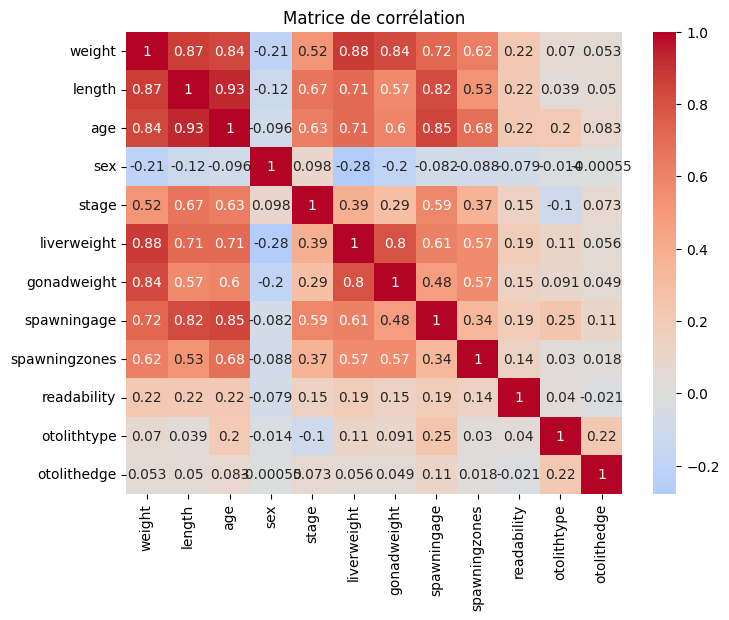

In [9108]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_a, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de corrélation')
plt.show()

In [9109]:
df_imputed['sex'] = df_imputed['sex'].fillna('0')  # ce sont des juvéniles 
# Vérification
print(df_imputed['sex'].value_counts(dropna=False))

sex
2.0    507
1.0    454
0       46
Name: count, dtype: int64


 <h3> Évaluation de la colonne "otolithtype" <h3>

1) Étude statistique de `otolithtype`

`otolithtype` :
Analyser la distribution, les valeurs manquantes et la relation avec l’âge, le sexe et d’autres variables biologiques.

In [9110]:
nb_total=len(df)
nb_valeurs=df_imputed['otolithtype'].notna().sum()
nb_nan=df_imputed['otolithtype'].isna().sum()
taux_de_remp=(nb_valeurs/nb_total)*100
taux_manquant=(nb_nan/nb_total)*100
print(f"Total d'observation: {nb_total}")
print(f"valeurs présentes : {taux_de_remp:.2f}%")
print(f"Valeurs manquantes: {taux_manquant:.2f}%")

Total d'observation: 1007
valeurs présentes : 97.02%
Valeurs manquantes: 2.98%


b) Distribution des valeurs présentes

In [9111]:
print(df_imputed['otolithtype'].value_counts(dropna=False))

otolithtype
5.0    812
1.0    115
NaN     30
4.0     29
2.0     21
Name: count, dtype: int64


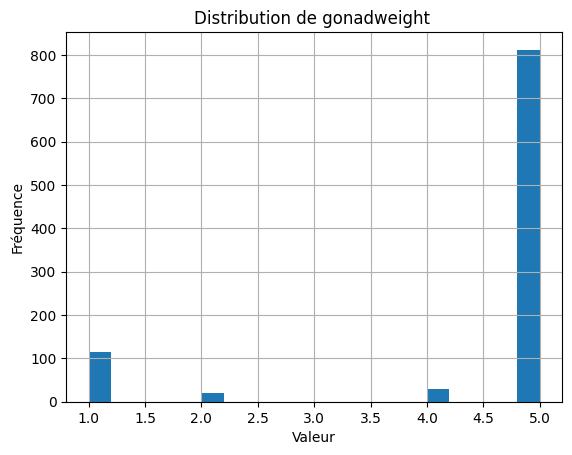

In [9112]:
df['otolithtype'].dropna().hist(bins=20)
plt.title('Distribution de gonadweight ')
plt.xlabel('Valeur')
plt.ylabel('Fréquence')
plt.show()

Sur les 1007 poissons, 977 ont une valeur pour otolithtype, donc très peu manquent (seulement 30, soit 2.98%).

In [9113]:
df['otolithtype'].describe()

count    977.000000
mean       4.433594
std        1.337891
min        1.000000
25%        5.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: otolithtype, dtype: float64

d) Distribution selon l'âge

In [9114]:
missing_by_age = df.groupby('age_group')['otolithtype'].apply(lambda x:x.isna().mean()*100)
print(missing_by_age)

age_group
[0, 1)            NaN
[1, 2)      75.675676
[2, 3)       0.000000
[3, 4)       0.000000
[4, 5)       0.000000
[5, 6)       0.000000
[6, 7)       0.000000
[7, 8)       0.000000
[8, 9)       0.000000
[9, 10)      0.000000
[10, 20)     0.000000
Name: otolithtype, dtype: float64


C:\Users\pc\AppData\Local\Temp\ipykernel_14948\4119439556.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  missing_by_age = df.groupby('age_group')['otolithtype'].apply(lambda x:x.isna().mean()*100)


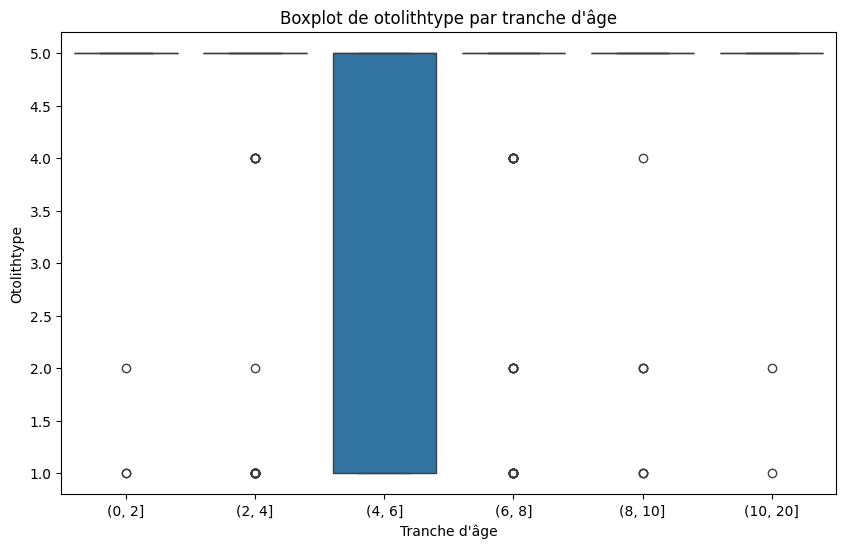

In [9115]:
plt.figure(figsize=(10,6))
sns.boxplot(x='age_group', y='otolithtype', data=df_imputed)
plt.title("Boxplot de otolithtype par tranche d'âge")
plt.xlabel("Tranche d'âge")
plt.ylabel("Otolithtype")
plt.show()

In [9116]:
cross_tab = pd.crosstab(df['sex'].fillna(-1), df['otolithtype'].isna(), margins=True)
print(cross_tab)

otolithtype  False  True   All
sex                           
-1.0            19    27    46
 1.0           451     3   454
 2.0           507     0   507
 All           977    30  1007


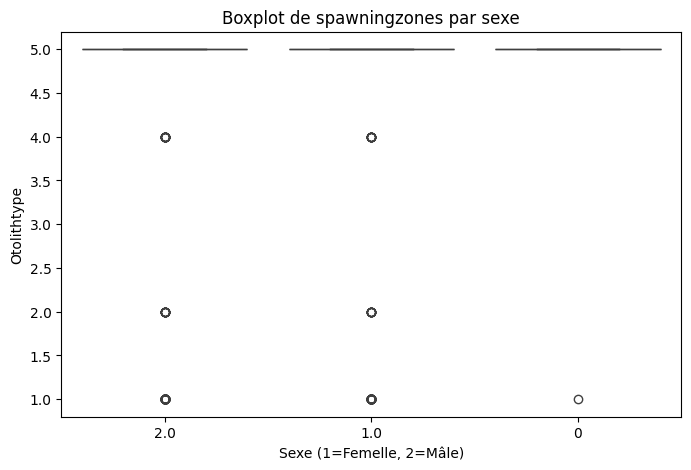

In [9117]:
plt.figure(figsize=(8,5))
sns.boxplot(x='sex', y='otolithtype', data=df_imputed)
plt.title("Boxplot de spawningzones par sexe")
plt.xlabel("Sexe (1=Femelle, 2=Mâle)")
plt.ylabel("Otolithtype")
plt.show()

In [9118]:
numeric_cols = ['weight', 'length', 'age', 'sex', 'stage', 'liverweight', 
                'gonadweight', 'spawningage', 'spawningzones', 'readability', 
                'otolithtype', 'otolithedge']
correlation_matrix_ot= df[numeric_cols].corr()
print("Corrélations avec otholithtype:")
print(correlation_matrix['otolithtype'].sort_values(ascending=False))

Corrélations avec otholithtype:
otolithtype      1.000000
spawningage      0.639693
otolithedge      0.223198
age              0.204277
liverweight      0.159359
spawningzones    0.102634
gonadweight      0.072512
weight           0.070220
readability      0.039853
length           0.039327
sex             -0.013986
stage           -0.088429
Name: otolithtype, dtype: float64


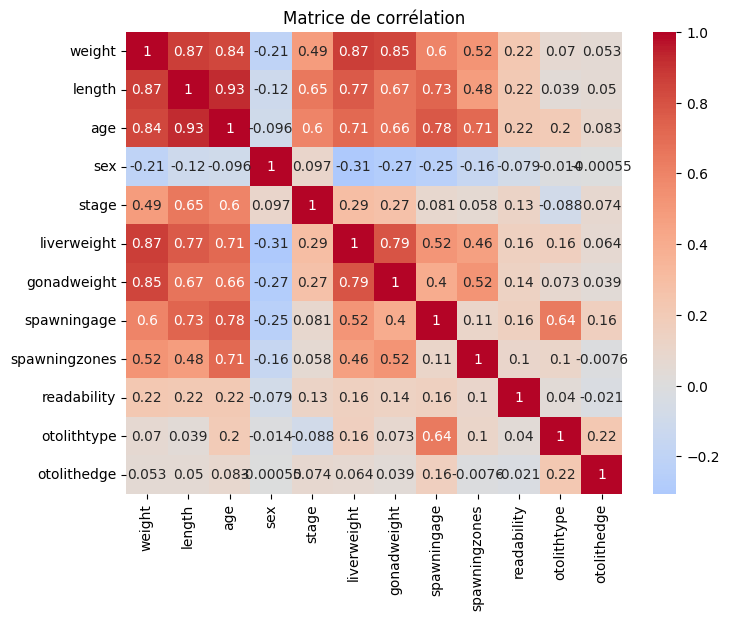

In [9119]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_ot, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de corrélation')
plt.show()

In [9120]:
mode_otolith = df_imputed['otolithtype'].mode()[0]
df_imputed['otolithtype'] = df_imputed['otolithtype'].fillna(mode_otolith)
print(df_imputed['otolithtype'].isna().sum()) 

0


In [9121]:
df_imputed['otolithtype'].unique()

array([5., 1., 2., 4.], dtype=float16)

 <h3> Évaluation de la colonne "weightmethod" <h3>

1) Étude statistique de `weightmethod`

`weightmethod` :
Analyser la distribution, les valeurs manquantes et la relation avec l’âge, le sexe et d’autres variables biologiques.

In [9122]:
nb_total=len(df_imputed)
nb_valeurs=df_imputed['weightmethod'].notna().sum()
nb_nan=df_imputed['weightmethod'].isna().sum()
taux_de_remp=(nb_valeurs/nb_total)*100
taux_manquant=(nb_nan/nb_total)*100
print(f"Total d'observation: {nb_total}")
print(f"valeurs présentes : {taux_de_remp:.2f}%")
print(f"Valeurs manquantes: {taux_manquant:.2f}%")

Total d'observation: 1007
valeurs présentes : 99.70%
Valeurs manquantes: 0.30%


Sur 1007 poissons, seulement 3 valeurs sont manquantes (très faible proportion).

2. Etude statistique

In [9123]:
df_imputed['weightmethod'].describe()

count    1004.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: weightmethod, dtype: float64

Toutes les valeurs présentes sont 1, c’est une variable constante.

In [9124]:
df_imputed= df_imputed.drop(columns=['weightmethod'])

 <h3> Évaluation de la colonne "weight" <h3>

1. Disponnibilité des données

In [9125]:
nb_total=len(df_imputed)
nb_valeurs=df_imputed['weight'].notna().sum()
nb_nan=df_imputed['weight'].isna().sum()
taux_de_remp=(nb_valeurs/nb_total)*100
taux_manquant=(nb_nan/nb_total)*100
print(f"Total d'observation: {nb_total}")
print(f"valeurs présentes : {taux_de_remp:.2f}%")
print(f"Valeurs manquantes: {taux_manquant:.2f}%")

Total d'observation: 1007
valeurs présentes : 99.70%
Valeurs manquantes: 0.30%


In [9126]:
df_imputed = df_imputed.dropna(subset=['weight'])

 <h3> Évaluation de la colonne "age_group" <h3>

1) Étude statistique de `age_group`

`age_group` :
Analyser la distribution, les valeurs manquantes et la relation avec l’âge, le sexe et d’autres variables biologiques.

In [9127]:
nb_total=len(df_imputed)
nb_valeurs=df_imputed['age_group'].notna().sum()
nb_nan=df_imputed['age_group'].isna().sum()
taux_de_remp=(nb_valeurs/nb_total)*100
taux_manquant=(nb_nan/nb_total)*100
print(f"Total d'observation: {nb_total}")
print(f"valeurs présentes : {taux_de_remp:.2f}%")
print(f"Valeurs manquantes: {taux_manquant:.2f}%")

Total d'observation: 1004
valeurs présentes : 99.80%
Valeurs manquantes: 0.20%


Il existe 2 valeurs manquantes seulement

In [9128]:
df_imputed = df_imputed.dropna(subset=['age_group'])

In [9129]:
df_imputed.isnull().sum().sort_values(ascending=False)

cruise           0
sex              0
otolithedge      0
otolithtype      0
readability      0
spawningzones    0
spawningage      0
lengthunit       0
gonadweight      0
liverweight      0
stage            0
age              0
serialno         0
length           0
weight           0
no               0
samplenumber     0
aphia            0
noname           0
species          0
SpecCat          0
platform         0
age_group        0
dtype: int64

<h2> On enlève les colonnes non pertinentes pour notre étude  <h2>

In [9130]:
cols_to_drop = ['cruise','samplenumber','no','platform','aphia','noname','species','SpecCat','lengthunit']

In [9131]:
df_clean = df_imputed.drop(columns=cols_to_drop)

In [9132]:
df_clean.head()

,serialno,weight,length,age,sex,stage,liverweight,gonadweight,spawningage,spawningzones,readability,otolithtype,otolithedge,age_group
0,70029,2000.0,62.0,6.0,2.0,1.0,0.048004,0.002001,6.000000,0,4,5.0,4.0,"(4, 6]"
1,70029,605.0,41.0,3.0,1.0,1.0,0.013000,0.003000,3.000000,0,1,5.0,4.0,"(2, 4]"
2,70029,800.0,46.0,4.0,2.0,1.0,0.011002,0.002001,4.000000,0,1,5.0,4.0,"(2, 4]"
3,70029,14.0,12.0,1.0,0,1.0,0.057607,0.188965,6.910156,0,1,5.0,4.0,"(0, 2]"
4,70029,195.0,27.0,3.0,1.0,1.0,0.028674,0.188965,3.000000,0,1,5.0,4.0,"(2, 4]"


In [9133]:
continuous_vars = ['age', 'length', 'weight', 'liverweight', 'gonadweight', 
                   'spawningage', 'spawningzones', 'readability', 'otolithedge']
categorical_vars = ['sex', 'stage', 'otolithtype']

<h2> Encodage des variables categorielles <h2>

In [9134]:
df_encoded = df_clean.copy()

In [9135]:
df_encoded['otolithtype'] = df_encoded['otolithtype'].astype(int)
df_encoded = pd.get_dummies(df_encoded, columns=['otolithtype'], prefix='otolithtype', drop_first=True)
bool_cols = ['otolithtype_2', 'otolithtype_4', 'otolithtype_5']
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

In [9136]:
df_encoded['sex'] = df_encoded['sex'].astype(int)
df_encoded['stage'] = df_encoded['stage'].astype(int)
df_encoded['readability'] = df_encoded['readability'].astype(int)
df_encoded['otolithedge'] = df_encoded['otolithedge'].astype(int)

One-Hot Encoding uniquement pour `otolithtype`** car il s'agit de catégories de populations sans ordre logique (Coastal cod, NEA cod, Svalbard cod, Farmed cod). Encoder en nombres impliquerait faussement que "Farmed cod (6)" est mathématiquement supérieur à "Coastal cod (1)", ce qui n'a pas de sens biologique.

Variables ordinales conservées en nombres** :
- `stage` (1-5) : progression juvénile en adulte mature
- `readability` (1-6) : niveau de difficulté de lecture croissant
- `otolithedge` (1-4) : progression des zones de croissance
- `sex` (0/1/2) : juvénile/femelle/mâle (classification directe)

Cette distinction préserve l'information ordinale tout en évitant d'imposer des relations mathématiques 

In [9137]:
df_encoded.head()

,serialno,weight,length,age,sex,stage,liverweight,gonadweight,spawningage,spawningzones,readability,otolithedge,age_group,otolithtype_2,otolithtype_4,otolithtype_5
0,70029,2000.0,62.0,6.0,2,1,0.048004,0.002001,6.000000,0,4,4,"(4, 6]",0,0,1
1,70029,605.0,41.0,3.0,1,1,0.013000,0.003000,3.000000,0,1,4,"(2, 4]",0,0,1
2,70029,800.0,46.0,4.0,2,1,0.011002,0.002001,4.000000,0,1,4,"(2, 4]",0,0,1
3,70029,14.0,12.0,1.0,0,1,0.057607,0.188965,6.910156,0,1,4,"(0, 2]",0,0,1
4,70029,195.0,27.0,3.0,1,1,0.028674,0.188965,3.000000,0,1,4,"(2, 4]",0,0,1


<h2> Standarisation <h2>

In [9140]:
continuous_vars = ['weight', 'length', 'age', 'liverweight', 'gonadweight', 
                   'spawningage', 'spawningzones', 'readability']
df_final = df_encoded.copy()

scaler = StandardScaler()
df_final[continuous_vars] = scaler.fit_transform(df_encoded[continuous_vars])

df_final = df_final.drop(['age_group'], axis=1)
# Garder serialno pour la concaténation future avec les photos

In [9139]:
df_final.head()

,serialno,weight,length,age,sex,stage,liverweight,gonadweight,spawningage,spawningzones,readability,otolithedge,otolithtype_2,otolithtype_4,otolithtype_5
0,70029,-0.554135,-0.282389,-0.308775,2,1,-0.642656,-0.611509,-0.191298,-0.536424,1.365130,0.10484,-0.14631,-0.169551,0.440771
1,70029,-0.905812,-1.108129,-1.265660,1,1,-0.751148,-0.610037,-1.528887,-0.536424,-0.438642,0.10484,-0.14631,-0.169551,0.440771
2,70029,-0.856653,-0.911525,-0.946698,2,1,-0.757344,-0.611509,-1.083024,-0.536424,-0.438642,0.10484,-0.14631,-0.169551,0.440771
3,70029,-1.054802,-2.248438,-1.903583,0,1,-0.612892,-0.336299,0.214507,-0.536424,-0.438642,0.10484,-0.14631,-0.169551,0.440771
4,70029,-1.009172,-1.658623,-1.265660,1,1,-0.702568,-0.336299,-1.528887,-0.536424,-0.438642,0.10484,-0.14631,-0.169551,0.440771
